In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
import warnings

warnings.filterwarnings('ignore')

In [46]:
# Set plot style
plt.style.use('default')
sns.set_palette("husl")

In [47]:
# Define paths
folder_path = "../../Data/images/"
train_path = folder_path + "train"
val_path = folder_path + "validation"

In [48]:
# Parameters
picture_size = 48  # Standard size for emotion recognition

In [49]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)

# Count images in each set
def count_images_per_class(path):
    counts = {}
    if os.path.exists(path):
        for class_name in os.listdir(path):
            class_path = os.path.join(path, class_name)
            if os.path.isdir(class_path):
                image_files = [f for f in os.listdir(class_path) 
                             if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
                counts[class_name] = len(image_files)
    return counts

train_counts = count_images_per_class(train_path)
val_counts = count_images_per_class(val_path)

print(f"Training classes: {len(train_counts)}")
print(f"Validation classes: {len(val_counts)}")
print(f"Total training images: {sum(train_counts.values())}")
print(f"Total validation images: {sum(val_counts.values())}")

print(f"\nClass names: {list(train_counts.keys())}")

DATASET OVERVIEW
Training classes: 7
Validation classes: 7
Total training images: 28821
Total validation images: 7066

Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [50]:
print("="*50)
print("IMAGE COUNTS PER CLASS")
print("="*50)

print("Training Set:")
for expression in train_counts:
    print(f"{train_counts[expression]} {expression} images")

print("\nValidation Set:")
for expression in val_counts:
    print(f"{val_counts[expression]} {expression} images")

IMAGE COUNTS PER CLASS
Training Set:
3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images

Validation Set:
960 angry images
111 disgust images
1018 fear images
1825 happy images
1216 neutral images
1139 sad images
797 surprise images


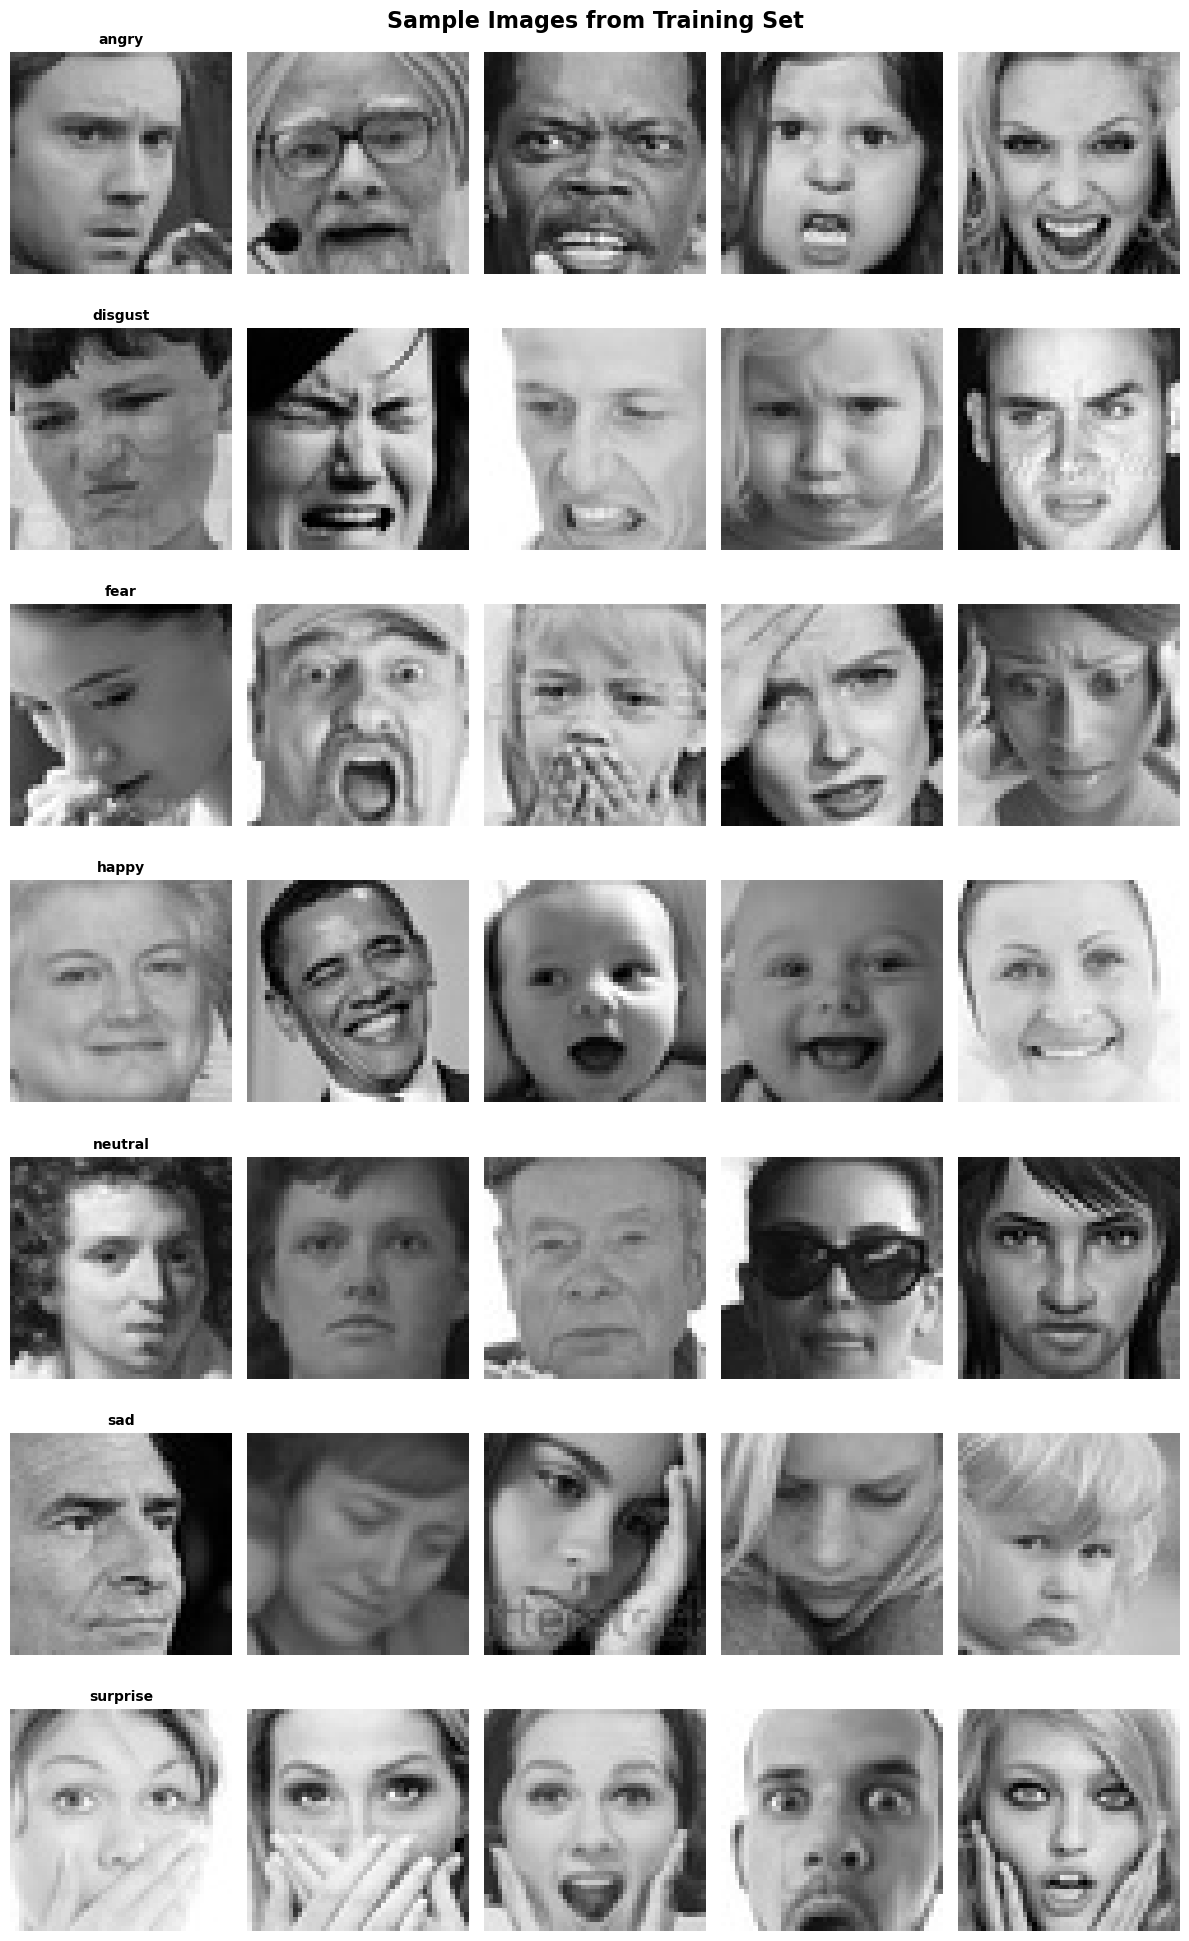

In [51]:
# Display sample images from training set
plt.figure(figsize=(12, 20))
cpt = 0

for expression in os.listdir(train_path):
    if os.path.isdir(os.path.join(train_path, expression)):
        expression_files = os.listdir(os.path.join(train_path, expression))
        for i in range(min(5, len(expression_files))):  # Show 5 samples per class
            cpt += 1
            plt.subplot(7, 5, cpt)
            img_path = os.path.join(train_path, expression, expression_files[i])
            try:
                img = load_img(img_path, target_size=(picture_size, picture_size))
                plt.imshow(img, cmap="gray")
                plt.axis('off')
                if i == 0:  # Label only the first image of each class
                    plt.title(expression, fontsize=10, fontweight='bold')
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

plt.suptitle('Sample Images from Training Set', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

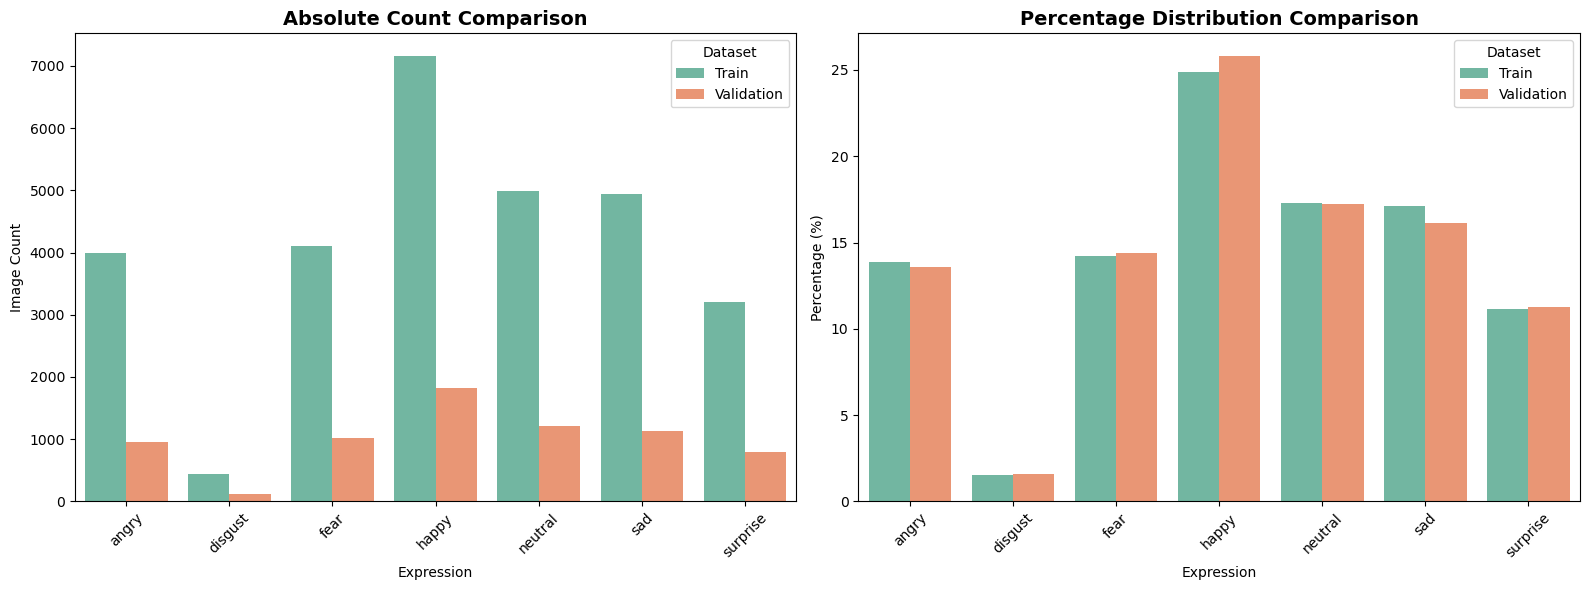

Distribution Consistency Analysis:
angry: Train 13.9% | Val 13.6% | Diff 0.3%  Consistent
disgust: Train 1.5% | Val 1.6% | Diff 0.1%  Consistent
fear: Train 14.2% | Val 14.4% | Diff 0.2%  Consistent
happy: Train 24.9% | Val 25.8% | Diff 1.0%  Consistent
neutral: Train 17.3% | Val 17.2% | Diff 0.1%  Consistent
sad: Train 17.1% | Val 16.1% | Diff 1.0%  Consistent
surprise: Train 11.1% | Val 11.3% | Diff 0.2%  Consistent


In [52]:
# Create DataFrames for comparison
df_train = pd.DataFrame(list(train_counts.items()), columns=["Expression", "Count"])
df_train["Set"] = "Train"
df_val = pd.DataFrame(list(val_counts.items()), columns=["Expression", "Count"])
df_val["Set"] = "Validation"
df_combined = pd.concat([df_train, df_val], axis=0)

# Calculate percentages and ratios
df_train["Percentage"] = (df_train["Count"] / df_train["Count"].sum()) * 100
df_val["Percentage"] = (df_val["Count"] / df_val["Count"].sum()) * 100

# Grouped bar chart with percentages
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count comparison
sns.barplot(data=df_combined, x="Expression", y="Count", hue="Set", palette="Set2", ax=axes[0])
axes[0].set_title("Absolute Count Comparison", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Expression")
axes[0].set_ylabel("Image Count")
axes[0].legend(title="Dataset")
axes[0].tick_params(axis='x', rotation=45)

# Percentage comparison
df_percentage = pd.concat([df_train[["Expression", "Percentage", "Set"]], 
                          df_val[["Expression", "Percentage", "Set"]]], axis=0)
sns.barplot(data=df_percentage, x="Expression", y="Percentage", hue="Set", palette="Set2", ax=axes[1])
axes[1].set_title("Percentage Distribution Comparison", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Expression")
axes[1].set_ylabel("Percentage (%)")
axes[1].legend(title="Dataset")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print distribution consistency
print("Distribution Consistency Analysis:")
print("="*40)
for expr in train_counts.keys():
    train_pct = (train_counts[expr] / sum(train_counts.values())) * 100
    val_pct = (val_counts[expr] / sum(val_counts.values())) * 100
    diff = abs(train_pct - val_pct)
    status = " Consistent" if diff < 5 else " Inconsistent"
    print(f"{expr}: Train {train_pct:.1f}% | Val {val_pct:.1f}% | Diff {diff:.1f}% {status}")

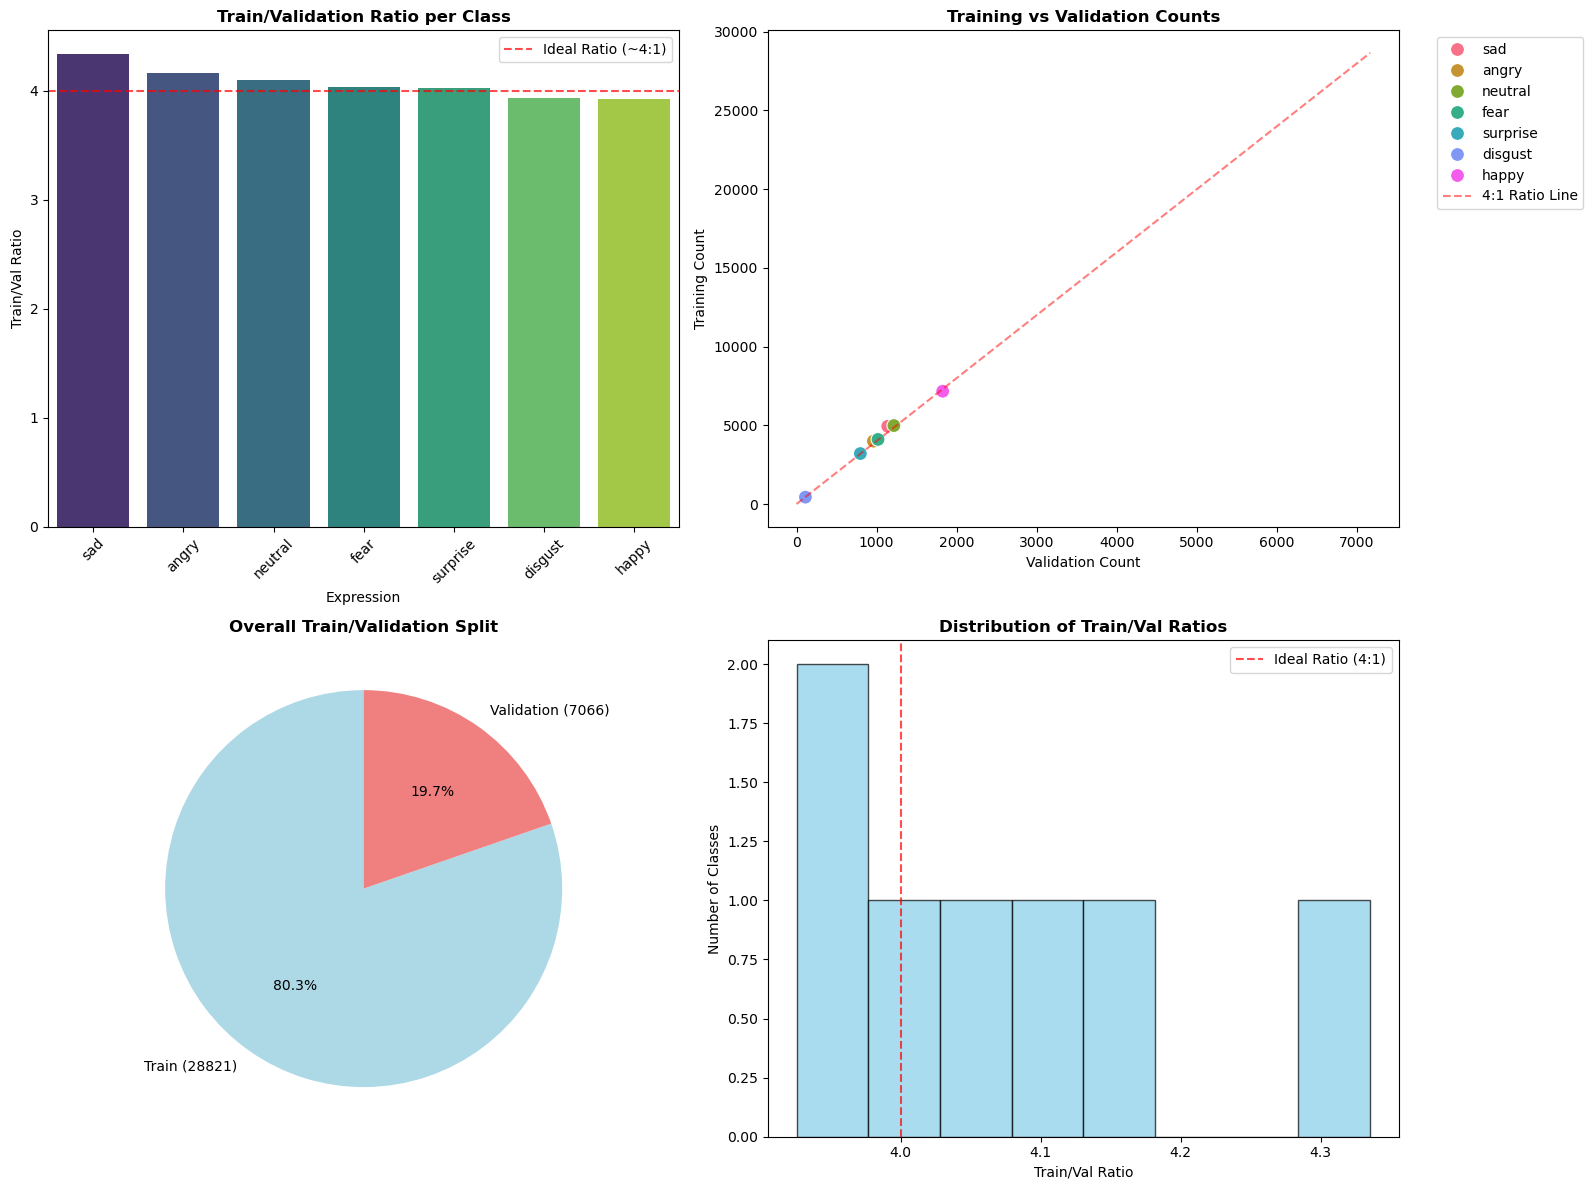

Train/Validation Ratio Analysis:
Overall Train/Val Ratio: 4.08
Recommended Range: 3.0 - 5.0
Status:  Good

Per-class ratios:
sad: 4.34  Good
angry: 4.16  Good
neutral: 4.10  Good
fear: 4.03  Good
surprise: 4.02  Good
disgust: 3.93  Good
happy: 3.93  Good


In [53]:
# Calculate train/validation ratios for each class
ratios_data = []
for expr in train_counts.keys():
    if expr in val_counts:
        ratio = train_counts[expr] / val_counts[expr] if val_counts[expr] > 0 else float('inf')
        ratios_data.append({
            'Expression': expr,
            'Train_Count': train_counts[expr],
            'Val_Count': val_counts[expr],
            'Train_Val_Ratio': ratio
        })

df_ratios = pd.DataFrame(ratios_data)
df_ratios = df_ratios.sort_values('Train_Val_Ratio', ascending=False)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Train/Val ratio per class
sns.barplot(data=df_ratios, x='Expression', y='Train_Val_Ratio', 
            palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Train/Validation Ratio per Class', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Expression')
axes[0,0].set_ylabel('Train/Val Ratio')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].axhline(y=4, color='red', linestyle='--', alpha=0.7, label='Ideal Ratio (~4:1)')
axes[0,0].legend()

# 2. Scatter plot: Train vs Val counts
sns.scatterplot(data=df_ratios, x='Val_Count', y='Train_Count', 
                hue='Expression', s=100, ax=axes[0,1])
axes[0,1].set_title('Training vs Validation Counts', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Validation Count')
axes[0,1].set_ylabel('Training Count')
# Add diagonal line for reference
max_val = max(df_ratios['Val_Count'].max(), df_ratios['Train_Count'].max())
axes[0,1].plot([0, max_val], [0, max_val*4], 'r--', alpha=0.5, label='4:1 Ratio Line')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Total dataset split
total_train = sum(train_counts.values())
total_val = sum(val_counts.values())
sizes = [total_train, total_val]
labels = [f'Train ({total_train})', f'Validation ({total_val})']
colors = ['lightblue', 'lightcoral']

axes[1,0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1,0].set_title('Overall Train/Validation Split', fontsize=12, fontweight='bold')

# 4. Ratio distribution histogram
axes[1,1].hist(df_ratios['Train_Val_Ratio'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].set_title('Distribution of Train/Val Ratios', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Train/Val Ratio')
axes[1,1].set_ylabel('Number of Classes')
axes[1,1].axvline(x=4, color='red', linestyle='--', alpha=0.7, label='Ideal Ratio (4:1)')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Print detailed ratio analysis
print("Train/Validation Ratio Analysis:")
print("="*45)
overall_ratio = total_train / total_val
print(f"Overall Train/Val Ratio: {overall_ratio:.2f}")
print(f"Recommended Range: 3.0 - 5.0")
print(f"Status: {' Good' if 3.0 <= overall_ratio <= 5.0 else ' Check ratio'}")
print("\nPer-class ratios:")
for _, row in df_ratios.iterrows():
    status = " Good" if 3.0 <= row['Train_Val_Ratio'] <= 5.0 else " Check"
    print(f"{row['Expression']}: {row['Train_Val_Ratio']:.2f} {status}")

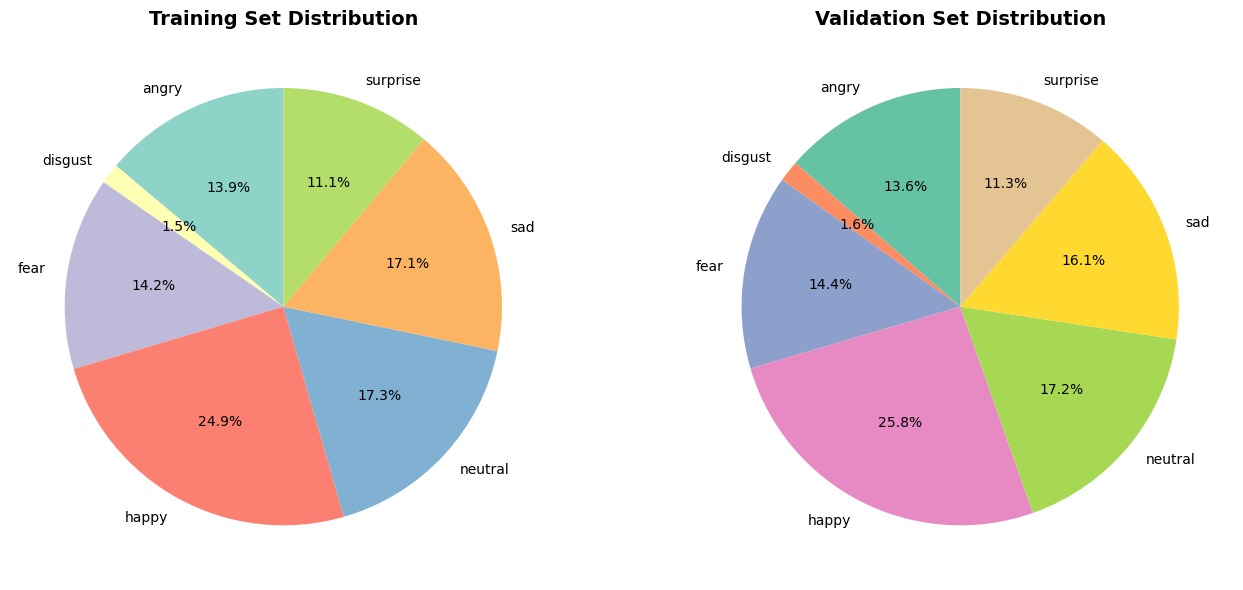

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set pie chart
axes[0].pie(df_train["Count"], labels=df_train["Expression"], autopct='%1.1f%%', 
            startangle=90, colors=plt.cm.Set3.colors)
axes[0].set_title("Training Set Distribution", fontsize=14, fontweight='bold')

# Validation set pie chart
axes[1].pie(df_val["Count"], labels=df_val["Expression"], autopct='%1.1f%%', 
            startangle=90, colors=plt.cm.Set2.colors)
axes[1].set_title("Validation Set Distribution", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [55]:
print("="*50)
print("IMAGE SIZE ANALYSIS")
print("="*50)

# Sample some images to check original dimensions
dimensions = []
sample_count = 0
max_samples = 50  # Sample 50 images

for expression in os.listdir(train_path):
    if sample_count >= max_samples:
        break
    expression_path = os.path.join(train_path, expression)
    if os.path.isdir(expression_path):
        image_files = os.listdir(expression_path)
        for img_name in image_files[:5]:  # Take first 5 from each class
            if sample_count >= max_samples:
                break
            img_path = os.path.join(expression_path, img_name)
            try:
                with Image.open(img_path) as img:
                    dimensions.append(img.size)  # (width, height)
                sample_count += 1
            except Exception as e:
                print(f"Error reading {img_path}: {e}")

if dimensions:
    widths = [d[0] for d in dimensions]
    heights = [d[1] for d in dimensions]
    
    print(f"Analyzed {len(dimensions)} sample images")
    print(f"Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}")
    print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}")
    print(f"Most common size: {max(set(dimensions), key=dimensions.count)}")
    print(f"Target size for training: {picture_size}x{picture_size}")
else:
    print("No images found for analysis")

IMAGE SIZE ANALYSIS
Analyzed 35 sample images
Width - Min: 48, Max: 48, Mean: 48.0
Height - Min: 48, Max: 48, Mean: 48.0
Most common size: (48, 48)
Target size for training: 48x48


In [56]:
## Summary and Recommendation
print("="*60)
print("SUMMARY & RECOMMENDATIONS")
print("="*60)

total_train = sum(train_counts.values())
total_val = sum(val_counts.values())

print(f" Total training images: {total_train}")
print(f" Total validation images: {total_val}")
print(f" Train/Val ratio: {total_train/total_val:.2f}")
print(f" Number of classes: {len(train_counts)}")

# Check for issues
if total_val < total_train * 0.15:
    print("  Validation set might be too small")
    print("   Consider increasing validation set size")
else:
    print(" Validation set size looks good")

print(f" Recommended image size: {picture_size}x{picture_size}")


SUMMARY & RECOMMENDATIONS
 Total training images: 28821
 Total validation images: 7066
 Train/Val ratio: 4.08
 Number of classes: 7
 Validation set size looks good
 Recommended image size: 48x48
